In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [92]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [93]:
M = 1
beam_shape = 2*M+1
conv_beam = 2*beam_shape - 1
tick_spacing = 1/(beam_shape)

In [94]:
xpoints = np.array([-1, 0, 0, 1, 1, 2, 2])
ypoints = np.array([0, 0, 1, 0, 1, 0, 1])
minx = np.min(xpoints)
maxx = np.max(xpoints)
xdist = maxx-minx
miny = np.min(ypoints)
maxy = np.max(ypoints)
ydist = maxy - miny

In [95]:
xticks = np.linspace(minx-2*tick_spacing, maxx+3*tick_spacing, (xdist + 2)*beam_shape)
yticks = np.linspace(miny-2*tick_spacing, maxy+3*tick_spacing, (ydist + 2)*beam_shape)

In [133]:
err = np.ones(2*len(xpoints)).reshape(2, len(xpoints))*2.5*tick_spacing
xerr = err
yerr = err

In [211]:
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='r',
                     edgecolor='None', alpha=0.5):

    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
#     hatchces = ['/', '\\', '|', '-', '+', 'x', 'o']

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum(), facecolor='none', ec=c,
                           linewidth=1.5, linestyle = 'dashed')
                  for x, y, xe, ye, c in zip(xdata, ydata, xerror.T, yerror.T, colors)]

    # Create patch collection with specified colour/alpha
#     pc = PatchCollection(errorboxes, alpha=alpha)

    # Add collection to axes
#     ax.add_collection(pc)
    for p in errorboxes:
        ax.add_patch(p)

    # Plot errorbars
#     artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror,
#                           fmt='None', ecolor='k')
    artists = ax.scatter(xdata, ydata, c=colors)

    return artists

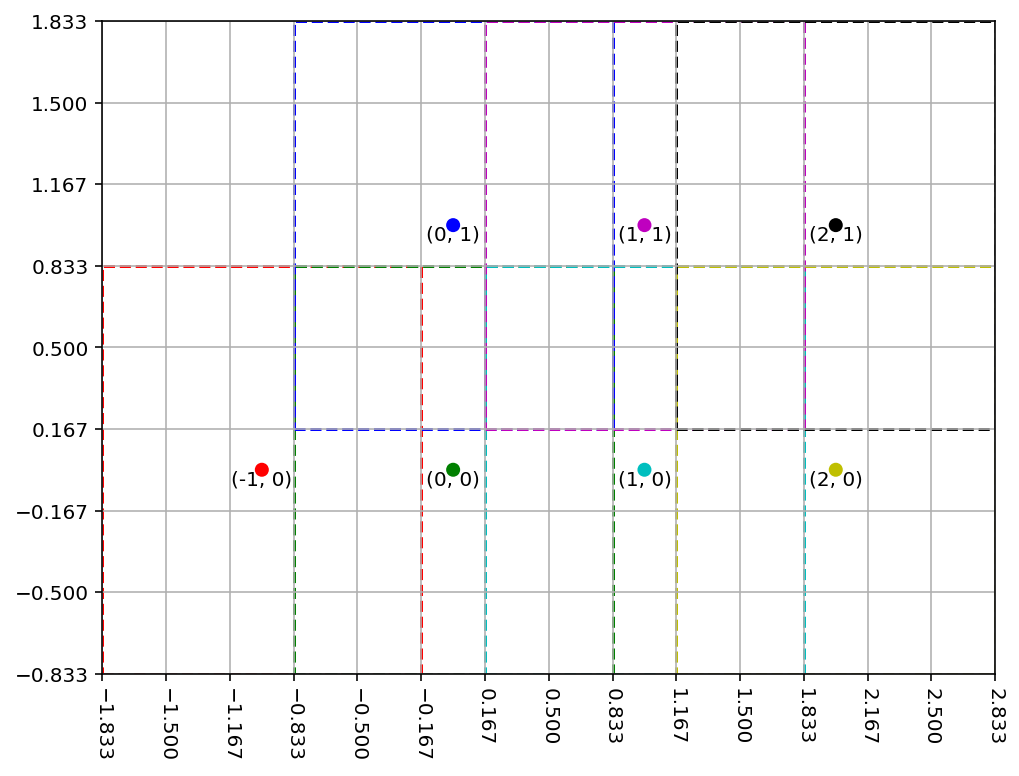

In [214]:
# Create figure and axes
fig, ax = plt.subplots(1, figsize=(8,6))

# Call function to create error boxes
_ = make_error_boxes(ax, xpoints, ypoints, xerr, yerr)

plt.xlim(-1.68, 2.68)
plt.ylim(-.68, 1.68)

plt.xticks(xticks - tick_spacing/2, rotation=270)
plt.yticks(yticks - tick_spacing/2)

for xy in zip(xpoints, ypoints):                                       
    ax.annotate('(%s, %s)' % xy, xy, ha='center', va='top')

plt.grid(True)

plt.show()

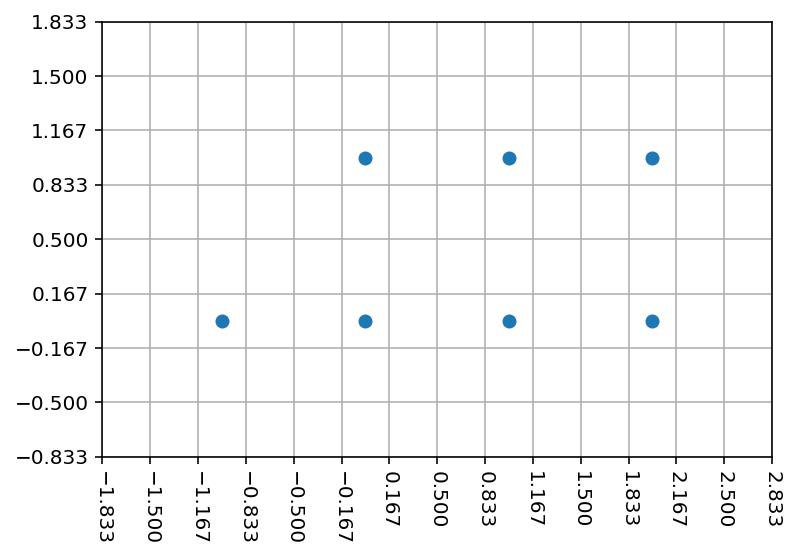

In [204]:
plt.scatter(xpoints, ypoints);
plt.xlim(-1.66, 2.66)
plt.ylim(-.66, 1.66)

plt.xticks(xticks - tick_spacing/2, rotation=270)
plt.yticks(yticks - tick_spacing/2)

plt.grid(True)